In [3]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does 
# dataset have?

import pandas as pd

df=pd.read_excel('flight_price.xlsx')
print('2-diamensions:',df.shape)
print('no of rows : ',df.shape[0])
print('no of columns : ',df.shape[1])

2-diamensions: (10683, 11)
no of rows :  10683
no of columns :  11


In [4]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


<Axes: ylabel='Frequency'>

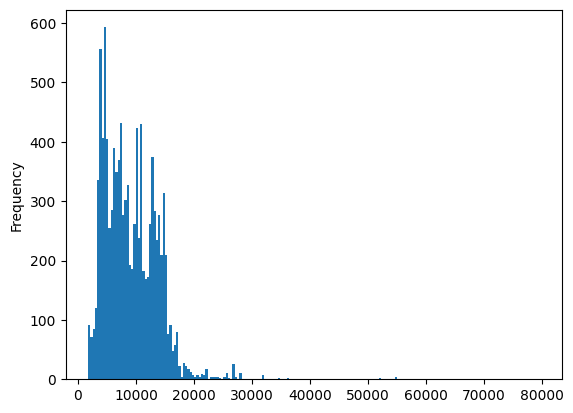

In [10]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.

import 